Some important notes:

- Don't worry if your group doesn't complete the challenge. We will assess your submission based on originality, quality, and presentation, rather than the extent to which you've completed the challenge.
- You're welcome to add as many markdown or code cells as necessary to the notebook.
- Before submitting, ensure that the notebook runs properly. Otherwise, it won't be evaluated.
- If you have any questions or concerns, please contact the organizers. We'll be available during the event, but if you can't reach us, feel free to send an email to berta.casas@bsc.es or sergi.masot@bsc.es.

Good luck!

# BSC Challenge: The Last Circuit Cut


The latest developments in geopolitics at the closing of the 21st century brought upon us the biggest war the world had ever seen. The main countries of the world have arranged themselves, through pacts and treacherous schemes, into two opposing blocks. In the tense standstill that has been reached, they threaten to destroy what is left of our planet with cutting-edge bioweapons in their efforts to erase each other. But scientists all over the world are still able to communicate, using the remains of a fragmented internet, held together only by a hidden data station in the dark side of the moon and their efforts to maintain it running. They are working together to force the imperial forces of both sides to lay down arms and find a peaceful resolution.  

In the last months, a group of scientists have been discussing the use of quantum computation to scale down the conflict. They want to use simulations to quickly find cures to the imperial weapons, and dismantle their grasp on the future of the world. Create a resistance force that can drive them to negotiate peacefully. However, the imperial forces are well aware of this possibility, and in what was the only truce of the war, they joined forces to destroy the most important quantum chip factories in the world. Now, only old devices from the long past NISQ era are left in the hands of the researchers, kept safe in their hidden, underground laboratories.

But not all hope is lost.

Among mounts of hundreds of elderly scrolls - which were surely about to be read by some PhD who had lost control of his to-read pile - they found references to circuit-cutting techniques. In these, NISQ chips are used to run small circuits many times in a specific setup that lets us collect the statistics and build the results of the larger, now unavailable (again) circuits. They think this could lead to a breakthrough, but all available hands are already busy sustaining the communication network, updating their Python libraries to keep the defences up (physicists are still using Python despite the best efforts of computer scientists) and optimizing the algorithms that they want to run, so they need help with the execution of the cuts. Their helium reserves for cryogenic fridges are starting to run low, and they are desperate to reach results.

They decide to invoke the ancient code of the hackathon. Maybe some challengers will raise up to the call...


## Circuit cutting theory

To begin, we will attempt to break down a small circuit. Let us examine one of the descriptions of circuit cutting, which we recommend using for this challenge. The derivation has been extracted from the remaining manuscripts https://arxiv.org/abs/1904.00102 and https://arxiv.org/abs/2012.02333. We will take advantage of the fact that any quantum circuit can be regarded as a directed graph $G = (V, E)$, where the vertices are represented by input states ($\triangleright$), quantum gates ($\square$), and observables ($\triangleleft$), and the edges are represented by the indices that link the vertices. Each vertex can be associated with a tensor $A(v)$ that encodes the matrix entries of the vertex (the state, the quantum gate, or the observable). We denote $\mathcal{A} = \{A(v)| v \in V\}$ as the set of all the tensors. All of these tensors $\mathcal{A}$ associated with the vertices $V$ and their corresponding edges $E$ form a tensor network $T(G, \mathcal{A})$ that is equivalent to the quantum algorithm that implements the quantum circuit.


Now that we know that we can represent any quantum algorithm by a tensor network, we are going to explain how we can **cut a qubit wire** and still reconstruct the quantum algorithm with classical post-processing. A single-qubit wire can be replaced by




\begin{equation}
u  \longrightarrow v \implies \sum_{i=1}^8 c_i \ u \longrightarrow  \ket{O_i} \bra{\rho_i}\longrightarrow v,
\end{equation}

where the left hand of the equation represents any one-qubit edge $uv$ and the right hand of the equation is the reconstruction of this edge. What this equation means is that there exists a specific set of eight coefficients $c_i\in \{- \frac 12, \frac 12\}$, obervables $O_i$ and states $\rho_i$ (that we are going to characterize) such that can replace the edge $uv$ and does not affect the value of the overall tensor network. In fact, we obtain a set of eight tensor networks $T(G', \mathcal{A}_i)$ with different graph and tensor structure that can replace the original tensor network in the following manner: 

$$T(G, \mathcal{A}) = \sum_{i=1}^8 c_i T(G', \mathcal{A}_i). \tag{2}$$



For gaining intuition in this processes, we are going to express any 2x2 matrix $A$ in terms of the Pauli matrices:

$$I = \begin{bmatrix} 1 &0 \\ 0 &1 \end{bmatrix}, \quad X = \begin{bmatrix} 0 &1 \\ 1 &0 \end{bmatrix}, \quad Y = \begin{bmatrix} 0 &-i \\ i &0 \end{bmatrix}, \quad Z = \begin{bmatrix} 1 &0 \\ 0 &-1 \end{bmatrix}. \tag{3} $$

The normalized Pauli matrices $\{I,X,Y,Z\}/\sqrt{2}$ form an orthonormal matrix basis, then we can decompose any general 2x2 matrix A into 

$$A = \frac{Tr(AI)I+ Tr(AX)X + Tr(AY)Y + Tr(AZ)Z}{2}.$$


By expanding the Pauli matrices in each eigenbasis: 

$$O_1 = I, \quad \rho_1= \ket{0}\bra{0}, \quad c_1 = +1/2, \\ 
O_2 = I , \quad \rho_2= \ket{1}\bra{1}, \quad c_2 = +1/2, \\
O_3 = X , \quad \rho_3= \ket{+}\bra{+}, \quad c_3 = +1/2, \\
O_4 = X, \quad \rho_4= \ket{-}\bra{-}, \quad c_4 =  -1/2,\\
O_5 = Y, \quad \rho_5= \ket{+i}\bra{+i}, \quad c_5 = +1/2, \\
O_6 = Y, \quad \rho_6= \ket{-i}\bra{-i}, \quad c_6 = -1/2, \\
O_7 = Z, \quad \rho_7= \ket{0}\bra{0}, \quad c_7 = +1/2,  \\
O_8 = Z, \quad \rho_8= \ket{1}\bra{1}, \quad c_8 = -1/2, \tag{4}\\
$$


where $\ket{\pm} = \frac{\ket{0}\pm \ket{1}}{\sqrt 2}$ and  $\ket{\pm i } = \frac{\ket{0}\pm i\ket{1}}{\sqrt 2}$. The observables $O_i$ represent each Pauli matrix, $\rho_i$ each eigenprojector or eigenvectors and $2c_i$ their eigenvalues. Then, we can rewrite the general matrix: 

$$A = \frac{Tr(AI)\big(\ket{0}\bra{0}+\ket{1}\bra{1}\big)+ Tr(AX)\big(\ket{+}\bra{+}-\ket{-}\bra{-}\big)+Tr(AY)\big(\ket{+i}\bra{+i}-\ket{-i}\bra{-i}\big)+Tr(AZ)\big(\ket{0}\bra{0}-\ket{1}\bra{1}\big)}{2}$$

In physical terms, applying the trace operator is equivalent to measuring a qubit in one of the Pauli bases, whereas utilizing a density matrix corresponds to physically initializing the qubit in a specific eigenstate. We define a quantum map given by 

$$ \Phi_i(A) = Tr(A O_i) \rho_i,$$ 

 
which consists of first measuring the Pauli observable $O_i$ on the cut and then continuing the wire initialized to another state given by $\rho_i$. We have to apply the map eight times (with its corresponding measurement and preparation) to reconstruct our arbitrary matrix

$$A = \sum_{i=1}^8 c_i \Phi_i(A).$$

This decomposition also applies to maps $\Phi$ acting on larger systems. Let's see an example that may summarize ideas with a larger circuit: 

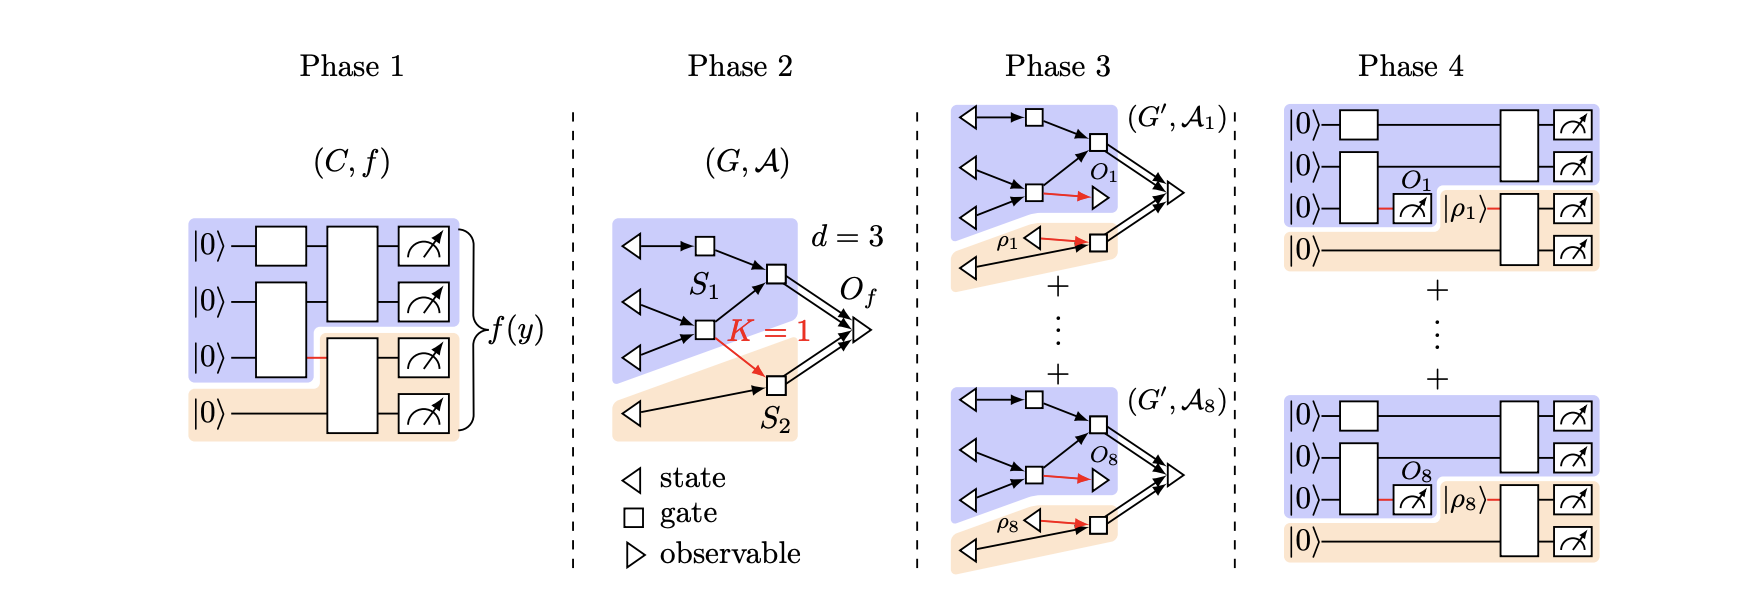*Figure from https://arxiv.org/abs/1904.00102*


In Phase 1, a quantum circuit to be cut is presented. It should be noted that only a single qubit wire is being cut. Phase 2 illustrates the representation of the quantum circuit with a tensor network. Phase 3 shows the decomposition of the original tensor network into eight different tensor network structures. These structures correspond to distinct quantum circuits, each with different measurements and state initializations, as depicted in Phase 4. The final output of the eight states is summed together according to Eq. (2) and with the corresponding $c_i$ shown in Eq. (4). 


To sum up, the steps followed in the cutting algorithm are: 

1. Choose the cut location.

2. Compute the expectation value of the observables $O_i\in \{I,X,Y,Z\}$ in the cut.

 *Hint: For computing the expectation value of I and Z, we have to measure on the same basis (the computational basis) but for measuring the expectation value of X and Y we have to change the basis of the qubit and measure. For example, for computing $\langle X \rangle$ we apply the Hadamard gate $H$, having mapped our qubit into the X basis. Now by only measuring, we can extract the information of the state on the X basis. For changing from the computational basis to the $Y$ basis we apply  $S^{\dagger} H$.*

3. The other cut of the circuit is initialized with the eight eigenstates given by the $\rho_i$ in Eq. (4) and then we run the sub-circuit. 

*Hint 2: For initializing into the different quantum states we can apply quantum gates to the zero states. For example: $\ket{1} = X \ket{0}$, $\ket{+}= H\ket{0}$, etc.*


4. With classical post-processing, we add together the outputs of the quantum circuits with the corresponding coefficients $c_i$.

 *Hint 3: Notice that if we have $n$ qubits and we do only one cut, we split the circuit into $\ket{q_1q_2...q_l}$ and $\ket{q_{l}'...q_n}$ like:*
 
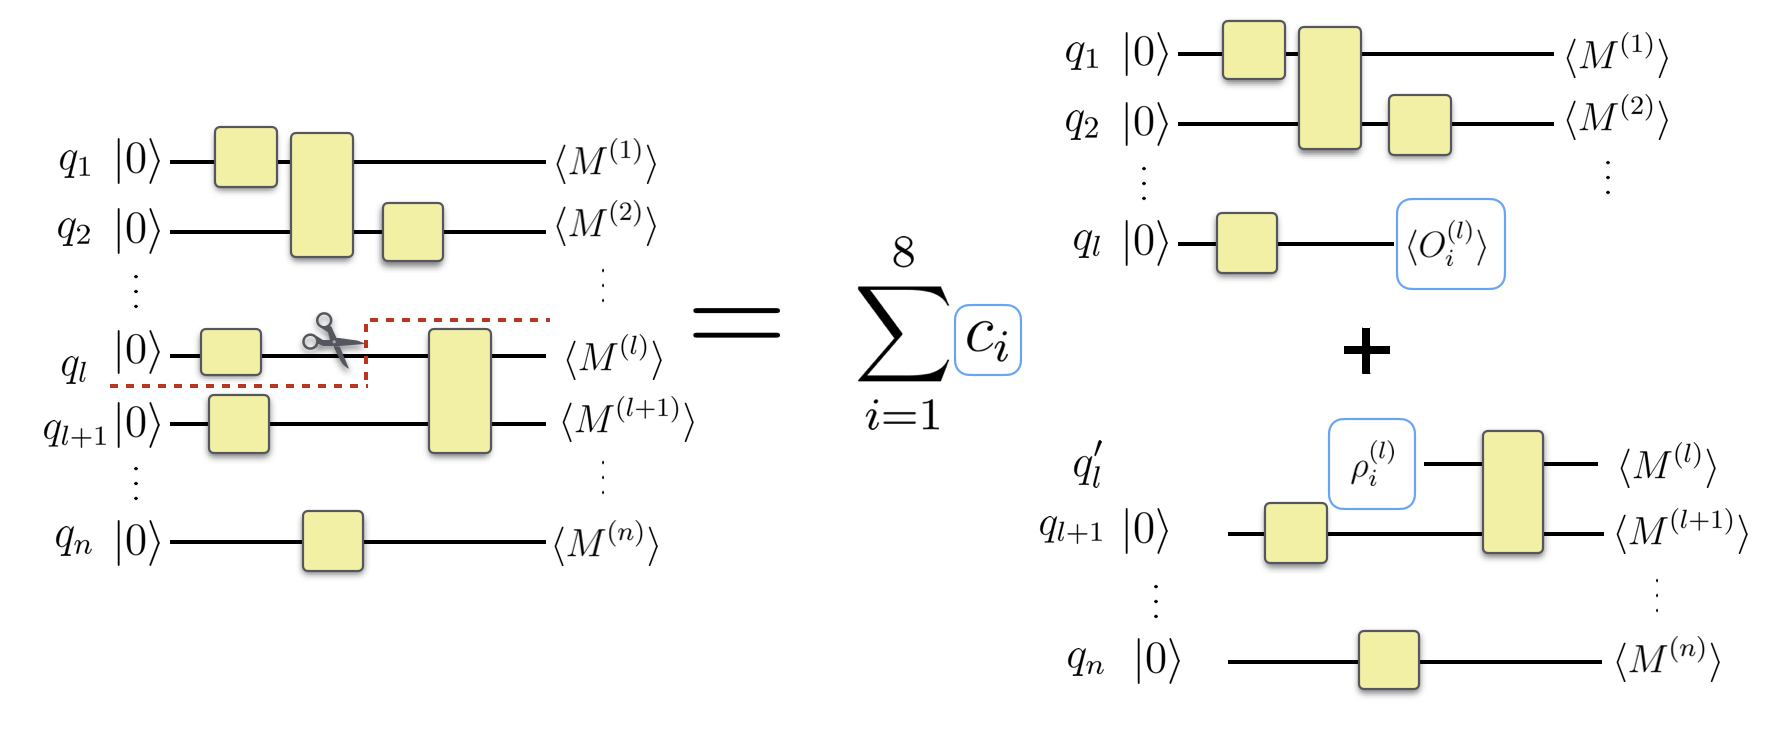


 *Then we will have to multiply expectations values of the type $\langle M^{(1)} M^{(2)}...O_i^{(l)}\rangle \langle M^{(l)}...M^{(n)}\rangle_{\rho_i^{(l)}}$, where the first bracket indicates measuring the first $l-1$ qubits and computing a given observable $M^{(j)}$, except from the last one, which we measure according to $O_i$ from Eq. 4. The second expectation value corresponds to the other cut of the circuit but with the qubit $q'_{l}$ (different from $q_l$ in the other sub-circuit) initialized to the state $\rho_i$ from Eq. 4 (indicated by the subscript $\rho_i^{(l)}$). Finally, the reconstruction of the  expectation value is given by:*

 $$\langle M^{(1)}M^{(2)}...M^{(l)}...M^{(n)}\rangle = \sum_{i=1}^8 c_i \langle M^{(1)} M^{(2)}...O_i^{(l)}\rangle \langle M^{(l)}...M^{(n)}\rangle_{\rho_i^{(l)}}$$





### First step 

We have the following quantum circuit: 

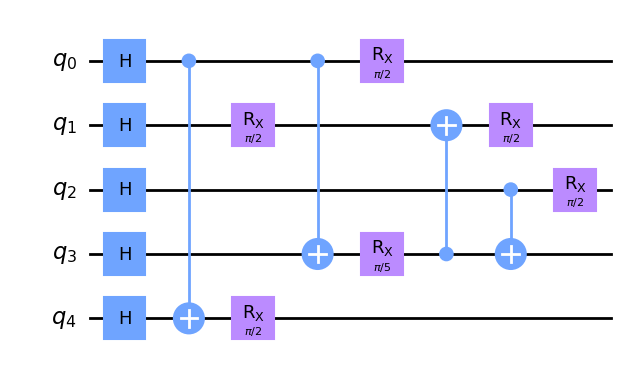

1. **Find a cut that is able to split the circuit into two subcircuits of three qubits each**. *Hint*: You can re-arrange the qubits ordering to find an optimal cut. In this step, you only have to indicate where you cut the circuit.

2. With exact simulation (for example, statevector simulation) compute the expectation value of the observable $\langle  X \otimes X \otimes X \otimes X \otimes X \rangle$ in the whole quantum circuit. Compare it with the expectation value obtained when we cut the circuit with the techniques explained above. Compare its value. Do we introduce errors by doing the cut? Justify it. 

3. Now, run the entire and the cut circuit in a quantum computer simulator (you can choose among the options that qiskit provides) and compare its results. Once the code works for the simulator, send it to the *ibmq_jakarta* quantum computer. Which expectation value has more error compared to the theoretical one, the entire circuit or the cut circuit? What explanation can you find?


*Tip: To make sure that your algorithm is cutting correctly the circuit, try different quantum circuits (for instance, changing the gates) and see if also work.*

*Tip 2*: Remember that qiskit ordering is $\ket{q_{n-1}, q_{n-2},..., q{_0}}$, where $n$ is the number of qubits. 

# LET'S START IMPORTING EVERYTHING WE NEED:

In [1036]:
import numpy as np
# Importing standard Qiskit libraries
from qiskit.opflow import I, X, Y, Z, H, CircuitStateFn
from qiskit import Aer, execute,QuantumCircuit
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from qiskit.circuit.library import RYGate, RXGate

### LETS DEFINE SOME FUNCTIONS FOR THE FUTURE

In [1037]:
def manual_replace(s, char, index):
    return s[:index] + char + s[index +1:]

# A) We will start with the theoretical calculation using state vectors:  

## Let's start by building the original circuit and simulate it:

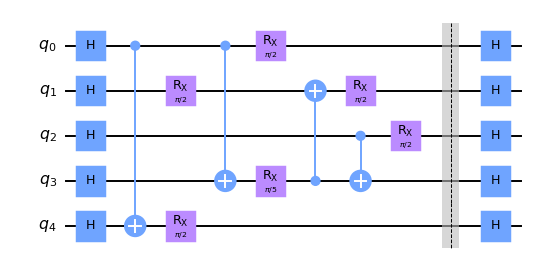

In [1038]:
# Initialize the circuit
num_qubits = 5
circ = QuantumCircuit(num_qubits)
# Add the correspodnding gates to the circuit
circ.h([0,1,2,3,4])
circ.cx(0,4)
circ.rx(np.pi/2, [1])
circ.rx(np.pi/2, [4])
circ.cx(0,3)
circ.rx(np.pi/2, [0])
circ.rx(np.pi/5, [3])
circ.cx( 3,1)
circ.rx(np.pi/2, [1])
circ.cx(2,3)
circ.rx(np.pi/2, [2])
# Change to X axis for measure
circ.barrier()
circ.h([0,1,2,3,4])
# Circuit print
circ.draw("mpl", fold=-1, scale=0.7)

## Let's check the histogram of the final state

The counts obtained for our sytem is:
{'00000': 1.0}


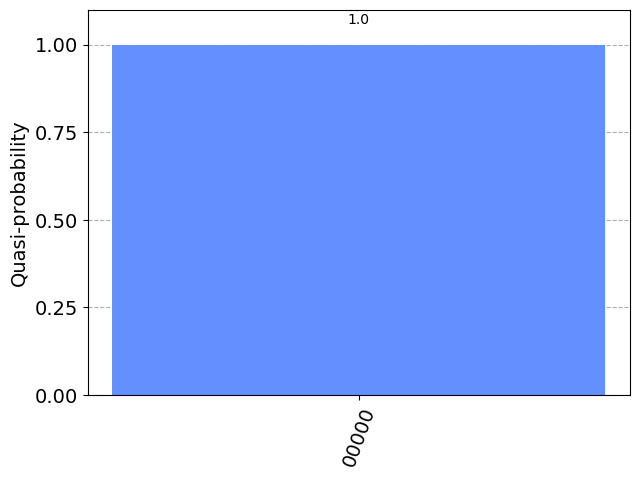

In [1039]:
# Get the counts
backend = Aer.get_backend('aer_simulator')
job = execute(circ, Aer.get_backend('statevector_simulator'))
counts = job.result().get_counts()
# Print counts
print('The counts obtained for our sytem is:')
print(counts)
# Histogram
plot_histogram(counts)

Where we can see that the final state of the system (before Hadamarts) is the |00000> of X.

## Let's now re-ordered the qubits so that an easy cut can be made: 

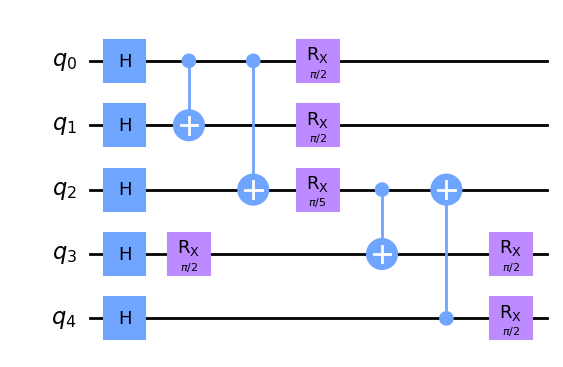

In [1040]:
# Initialize circuit
circuit = QuantumCircuit(5, 0)
# Add the corresponding gates
circuit.h([0,1,2,3,4])
circuit.cx(0,1)
circuit.cx(0,2)
circuit.rx(np.pi/2, 3)
circuit.rx(np.pi/2, 0)
circuit.rx(np.pi/2, 1)
circuit.rx(np.pi/5, 2)
circuit.cx(2,3)
circuit.cx(4,2)
circuit.rx(np.pi/2, 3)
circuit.rx(np.pi/2, 4)
# Print circuit
circuit.draw("mpl")

In [1041]:
# Get the expected value
circuit_state = CircuitStateFn(circuit)
circuit_state
expected_result = circuit_state.adjoint().compose(X^X^X^X^X).compose(circuit_state).eval().real
print('Expected value of X with the whole circuit:', expected_result)

Expected value of X with the whole circuit: 0.9999999999999989


Confirming that we had the |00000> state in the X axis.

## Let's now proceed to the circuit cutting: 

### We want to cut the circuit in two with 3 qubits each.

<img src="https://i.imgur.com/4pFf9va.jpeg" width="600" height="450">

### Which results in:

<img src="https://i.imgur.com/0Oe6A8L.jpg" width="600" height="500">

#### Circuit 1:

In [1042]:
# circuit 1: 
list_of_opeartors = [I, X, Y, Z] 
results_1 = []


for OPERATOR in list_of_opeartors:
    print('Operator:', OPERATOR)
    #Initilize the 4 circuits
    num_qubits = 3
    circuit1 = QuantumCircuit(num_qubits)
    # Add the corresponding gates
    circuit1.h([0,1,2])
    circuit1.cx(0,1)
    circuit1.cx(0,2)
    circuit1.rx(np.pi/5, 2)
    circuit1.rx(np.pi/2, 0)
    circuit1.rx(np.pi/2, 1)
    # Compute expected value
    circuit_state = CircuitStateFn(circuit1)
    expected_value = circuit_state.adjoint().compose(OPERATOR^X^X).compose(circuit_state).eval().real
    # Append them
    results_1.append(expected_value)
# Print expected values
"The expected values of circuit_1 ,for the four elements of the 2x2 matrix base, I,X,Y,Z are respectively:", results_1


Operator: I
Operator: X
Operator: Y
Operator: Z


('The expected values of circuit_1 ,for the four elements of the 2x2 matrix base, I,X,Y,Z are respectively:',
 [0.9999999999999997, 0.9999999999999997, 0.0, 0.0])

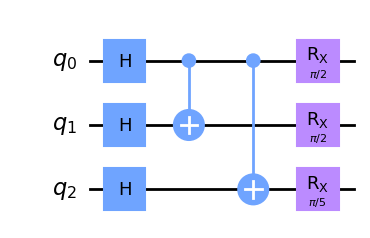

In [1043]:
# Print circuit
circuit1.draw('mpl')

#### Circuit 2 :

In [1044]:
#initial_states = [[1, 0], [0, 1], [1, 1], [1, -1], [1, 1.j], [1, -1.j], [1, 0], [0, 1]]
initial_operators = [I, X, RYGate(np.pi/2) , RYGate(-np.pi/2), RXGate(-np.pi/2), RXGate(np.pi/2), I, X]

results_2 = []
for operator in initial_operators:
    #Initialize the 8 circuits
    num_qubits = 3
    circuit2 = QuantumCircuit(num_qubits)
    # Add the corresponding gates
    circuit2.append(operator, [0])
    circuit2.h([1,2])
    circuit2.rx(np.pi/2, 1)
    circuit2.cx(0,1)
    circuit2.cx(2,0)
    circuit2.rx(np.pi/2, 1)
    circuit2.rx(np.pi/2, 2)
    # Compute the expected values
    circuit_state2 = CircuitStateFn(circuit2)
    print(circuit_state2)
    expected_value2 = circuit_state2.adjoint().compose(X^X^X).compose(circuit_state2).eval().real
    # Append
    results_2.append(expected_value2)
# Print expected
print("The expected values of circuit_2 with the 8 different initialized states are : ")
print( results_2)

CircuitStateFn(
                          ┌───┐           
q_0: ──────────────────■──┤ X ├───────────
     ┌───┐┌─────────┐┌─┴─┐└─┬─┘┌─────────┐
q_1: ┤ H ├┤ Rx(π/2) ├┤ X ├──┼──┤ Rx(π/2) ├
     ├───┤└─────────┘└───┘  │  ├─────────┤
q_2: ┤ H ├──────────────────■──┤ Rx(π/2) ├
     └───┘                     └─────────┘
)
CircuitStateFn(
     ┌───┐                ┌───┐           
q_0: ┤ X ├─────────────■──┤ X ├───────────
     ├───┤┌─────────┐┌─┴─┐└─┬─┘┌─────────┐
q_1: ┤ H ├┤ Rx(π/2) ├┤ X ├──┼──┤ Rx(π/2) ├
     ├───┤└─────────┘└───┘  │  ├─────────┤
q_2: ┤ H ├──────────────────■──┤ Rx(π/2) ├
     └───┘                     └─────────┘
)
CircuitStateFn(
     ┌─────────┐                ┌───┐           
q_0: ┤ Ry(π/2) ├─────────────■──┤ X ├───────────
     └──┬───┬──┘┌─────────┐┌─┴─┐└─┬─┘┌─────────┐
q_1: ───┤ H ├───┤ Rx(π/2) ├┤ X ├──┼──┤ Rx(π/2) ├
        ├───┤   └─────────┘└───┘  │  ├─────────┤
q_2: ───┤ H ├─────────────────────■──┤ Rx(π/2) ├
        └───┘                        └─────────┘
)
C

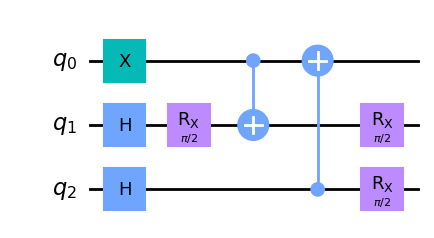

In [1045]:
# Print circuit
circuit2.draw('mpl')

#### Putting everything together:

In [1046]:
# Multiply all the corresponding coeficient together element wise
results_1= list(np.repeat(results_1, 2))
coefficients_c = [0.5, 0.5, 0.5, -0.5, 0.5, -0.5,0.5, -0.5]
state_reconstructed = []
result = 0
for i in range(8):
    result = result + coefficients_c[i] * results_1[i]*results_2[i]
# Print expected value and relative error  
print("Expected value of X with the two circuits cutted and later joined: ", result)
print("Relative error: ", (expected_result - result)/expected_result)

Expected value of X with the two circuits cutted and later joined:  0.9999999999999994
Relative error:  -5.551115123125789e-16


Where we can see that the expected value with the X operator matches the same measurement with cutted circuit and with the whole circuite. The error is negligible. 

### WE NOW ADD A NEW GATE FOR THE SAKE OF TESTING A DIFFERENT CIRCUIT

<img src="https://i.imgur.com/HrAF9II.jpg" width="600" height="400">

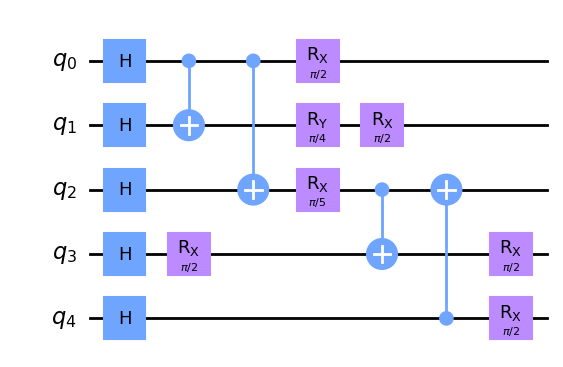

In [1047]:
# Initialize circuit
circuit = QuantumCircuit(5, 0)
# Add corresponding gates
circuit.h([0,1,2,3,4])
circuit.cx(0,1)
circuit.cx(0,2)
circuit.ry(np.pi/4, 1) # <<< This one is added for the sake of testing different circuits
circuit.rx(np.pi/2, 3)
circuit.rx(np.pi/2, 0)
circuit.rx(np.pi/2, 1)
circuit.rx(np.pi/5, 2)
circuit.cx(2,3)
circuit.cx(4,2)
circuit.rx(np.pi/2, 3)
circuit.rx(np.pi/2, 4)
# Print circuit
circuit.draw("mpl")

In [1048]:
circuit_state = CircuitStateFn(circuit)
circuit_state
expected_result = circuit_state.adjoint().compose(X^X^X^X^X).compose(circuit_state).eval().real
print('Expected value of X with the whole circuit:', expected_result)

Expected value of X with the whole circuit: 0.7071067811865468


Where we can see that our expected value now has changed from 0.9999 to 0.7, so we no longer have the |00000> state of X.

### NOW AGAIN LETS CURT THE CIRCUIT WITH THE NEW ELEMENT ADDED

#### Circuit 1

In [1049]:
# circuit 1: 
list_of_opeartors = [I, X, Y, Z] 

results_1 = []

for OPERATOR in list_of_opeartors:
    print('Operator:', OPERATOR)
    num_qubits = 3
    circuit1 = QuantumCircuit(num_qubits)

    circuit1.h([0,1,2])
    circuit1.cx(0,1)
    circuit1.cx(0,2)
    
    circuit1.ry(np.pi/4, 1)
    
    circuit1.rx(np.pi/5, 2)
    circuit1.rx(np.pi/2, 0)
    circuit1.rx(np.pi/2, 1)
    
    circuit_state = CircuitStateFn(circuit1)
    expected_value = circuit_state.adjoint().compose(OPERATOR^X^X).compose(circuit_state).eval().real

    results_1.append(expected_value)
    
"The expected values of circuit_1 ,for the four elements of the 2x2 matrix base, I,X,Y,Z are respectively:: ", results_1


Operator: I
Operator: X
Operator: Y
Operator: Z


('The expected values of circuit_1 ,for the four elements of the 2x2 matrix base, I,X,Y,Z are respectively:: ',
 [0.707106781186547, 0.707106781186547, 0.0, 0.0])

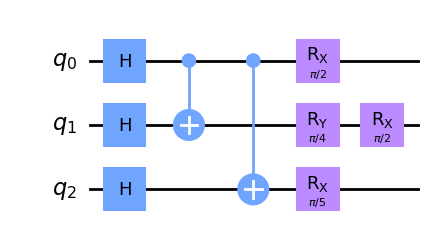

In [1050]:
circuit1.draw('mpl')

#### Circuit 2

In [1051]:
initial_operators = [I, X, RYGate(np.pi/2) , RYGate(-np.pi/2), RXGate(-np.pi/2), RXGate(np.pi/2), I, X]

results_2 = []
for operator in initial_operators:
    num_qubits = 3
    circuit2 = QuantumCircuit(num_qubits)
    
    
    circuit2.append(operator, [0])

    circuit2.h([1,2])
    circuit2.rx(np.pi/2, 1)
    circuit2.cx(0,1)
    circuit2.cx(2,0)
    circuit2.rx(np.pi/2, 1)
    circuit2.rx(np.pi/2, 2)
    
    circuit_state2 = CircuitStateFn(circuit2)
    print(circuit_state2)
    expected_value2 = circuit_state2.adjoint().compose(X^X^X).compose(circuit_state2).eval().real

    results_2.append(expected_value2)

"The expected values of circuit_2 with the 8 different initialized states are : ", results_2

CircuitStateFn(
                          ┌───┐           
q_0: ──────────────────■──┤ X ├───────────
     ┌───┐┌─────────┐┌─┴─┐└─┬─┘┌─────────┐
q_1: ┤ H ├┤ Rx(π/2) ├┤ X ├──┼──┤ Rx(π/2) ├
     ├───┤└─────────┘└───┘  │  ├─────────┤
q_2: ┤ H ├──────────────────■──┤ Rx(π/2) ├
     └───┘                     └─────────┘
)
CircuitStateFn(
     ┌───┐                ┌───┐           
q_0: ┤ X ├─────────────■──┤ X ├───────────
     ├───┤┌─────────┐┌─┴─┐└─┬─┘┌─────────┐
q_1: ┤ H ├┤ Rx(π/2) ├┤ X ├──┼──┤ Rx(π/2) ├
     ├───┤└─────────┘└───┘  │  ├─────────┤
q_2: ┤ H ├──────────────────■──┤ Rx(π/2) ├
     └───┘                     └─────────┘
)
CircuitStateFn(
     ┌─────────┐                ┌───┐           
q_0: ┤ Ry(π/2) ├─────────────■──┤ X ├───────────
     └──┬───┬──┘┌─────────┐┌─┴─┐└─┬─┘┌─────────┐
q_1: ───┤ H ├───┤ Rx(π/2) ├┤ X ├──┼──┤ Rx(π/2) ├
        ├───┤   └─────────┘└───┘  │  ├─────────┤
q_2: ───┤ H ├─────────────────────■──┤ Rx(π/2) ├
        └───┘                        └─────────┘
)
C

('The expected values of circuit_2 with the 8 different initialized states are : ',
 [0.9999999999999997,
  0.9999999999999997,
  0.9999999999999997,
  0.9999999999999997,
  0.9999999999999997,
  0.9999999999999997,
  0.9999999999999997,
  0.9999999999999997])

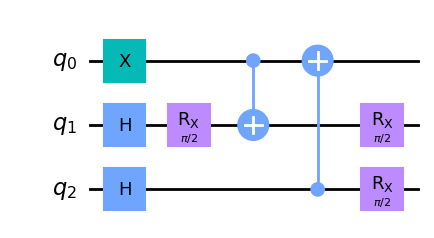

In [1052]:
circuit2.draw('mpl')

#### And putting everything together again:

In [1053]:
results_1= list(np.repeat(results_1, 2))
coefficients_c = [0.5, 0.5, 0.5, -0.5, 0.5, -0.5,0.5, -0.5]
state_reconstructed = []
result = 0
for i in range(8):
    result = result + coefficients_c[i] * results_1[i]*results_2[i]
print("Expected value of X with the two circuits cutted and later joined: ", result)
print("Relative error: ", (expected_result - result)/expected_result)

Expected value of X with the two circuits cutted and later joined:  0.7071067811865467
Relative error:  1.5700924586837766e-16


Where finally we see that the cutted circuit coincides again with the full one!

# B) We will now simulate as if we had real qubits with shoots:  

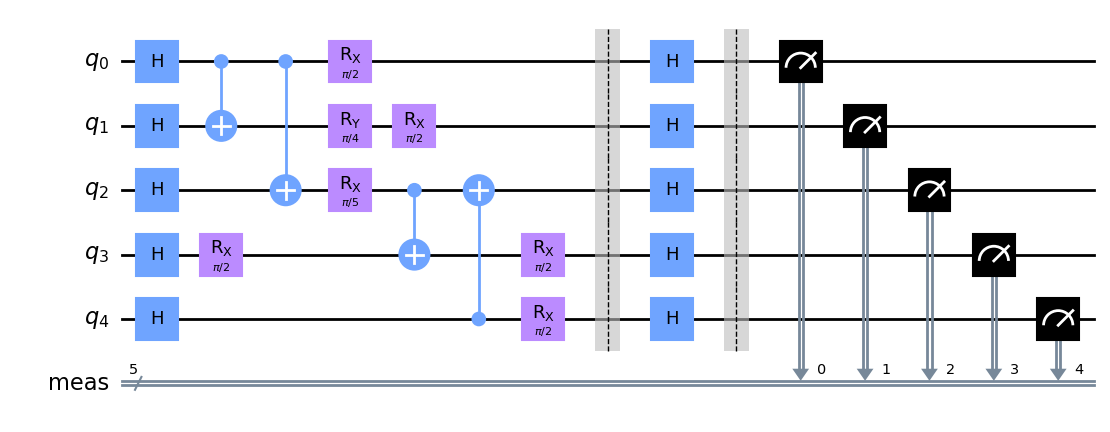

In [1054]:
shots=10000
circuit = QuantumCircuit(5, 0)

circuit.h([0,1,2,3,4])
circuit.cx(0,1)
circuit.cx(0,2)

circuit.ry(np.pi/4, 1)

#Declaramos la Rx
circuit.rx(np.pi/2, 3)
circuit.rx(np.pi/2, 0)
circuit.rx(np.pi/2, 1)
circuit.rx(np.pi/5, 2)


circuit.cx(2,3)
circuit.cx(4,2)

circuit.rx(np.pi/2, 3)
circuit.rx(np.pi/2, 4)
circuit.barrier()
circuit.h([0,1,2,3,4]) #This is to measre in X basis
circuit.measure_all()
circuit.draw("mpl")



The counts obtained for our sytem is:
{'00010': 1550, '00000': 8450}

So the final expected value is then:
0.69


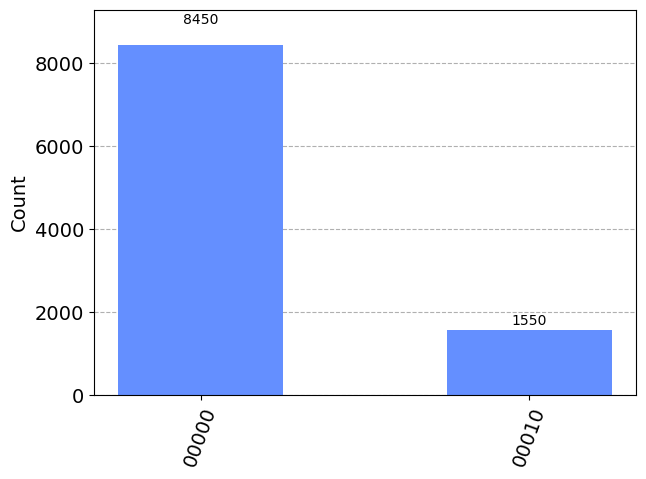

In [1055]:
#Original circuit: 
job = execute(circuit, backend, shots=shots)
counts = job.result().get_counts()
print('The counts obtained for our sytem is:')
print(counts)

exp_value = 0
for key, value in counts.items():
    if len(key.replace("0",""))%2 == 0:
        exp_value = exp_value + (value/shots)
    else:
        exp_value = exp_value - (value/shots)

print('\nSo the final expected value is then:')
print(exp_value)

plot_histogram(counts)

We see that with shoots, instead than using state vectors, we get the same result.

(This is the same histogram as the one at the start, but when you add the new gate in the middle of the circuit as we did)

## Let's proceed to the circuit cutting again: 

### We want to cut the circuit in two with 3 qubits each.

#### Circuit 1

Results of the counts, for the different output Operators of circuit1, in order (I,X,Y,Z):
{'100': 4217, '010': 729, '110': 733, '000': 4321}
{'010': 1504, '000': 8496}
{'100': 4263, '010': 729, '110': 693, '000': 4315}
{'010': 758, '110': 706, '000': 4283, '100': 4253}

 Final expected value for each circuit: 
[0.7076, 0.6992, 0.0015999999999999348, -0.0021999999999999797]


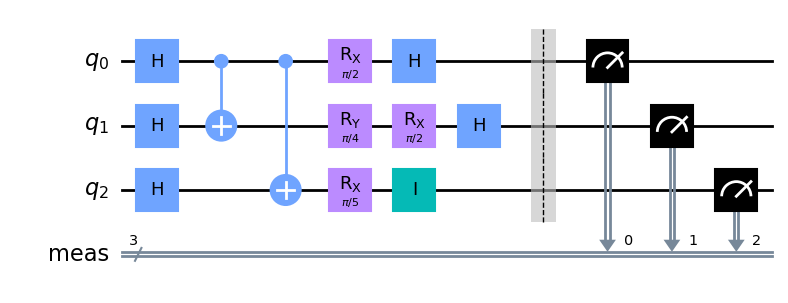

In [1056]:
# circuit 1: 
list_of_operators = [I, H , "", I] # <<< The "" is there because we use two gates here, instead of 1, and we add it manually afterwards
print('Results of the counts, for the different output Operators of circuit1, in order (I,X,Y,Z):')

shots=10000
results_1 = []
counter = 0

for OPERATOR in list_of_operators:
    num_qubits = 3
    circuit1 = QuantumCircuit(num_qubits)

    circuit1.h([0,1,2])
    circuit1.cx(0,1)
    circuit1.cx(0,2)
    
    circuit1.ry(np.pi/4, 1)
    
    circuit1.rx(np.pi/5, 2)
    circuit1.rx(np.pi/2, 0)
    circuit1.rx(np.pi/2, 1)
    
    circuit1.h([0,1])

    if counter == 2:  # <<< Here we are adding the two matrices that should have gone in ""
        circuit1.sdg([2])
        circuit1.h([2])
    else:
        circuit1.append(OPERATOR, [2])
    
    circuit1.measure_all()
        
    job = execute(circuit1, backend, shots=shots)
    counts = job.result().get_counts()
    print(counts)
    exp_value = 0
    
    for key, value in counts.items():
        if counter == 0:
            corrected_key=manual_replace(key,"0",0)
        else: 
            corrected_key=key
        if len(corrected_key.replace("0",""))%2 == 0:
            exp_value = exp_value + (value/shots)
        else:
            exp_value = exp_value - (value/shots)
    counter += 1
    results_1.append(exp_value)
print("\n Final expected value for each circuit: ")
print(results_1)
results_1= list(np.repeat(results_1, 2))
circuit1.draw('mpl')

#### Circuit 2

Results of the counts, for the 8 different inputs state of circuit2:
{'101': 4982, '000': 5018}
{'000': 5082, '101': 4918}
{'000': 10000}
{'101': 10000}
{'101': 5048, '000': 4952}
{'000': 5025, '101': 4975}
{'000': 4962, '101': 5038}
{'101': 5075, '000': 4925}

 Expected value for each circuit: 
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


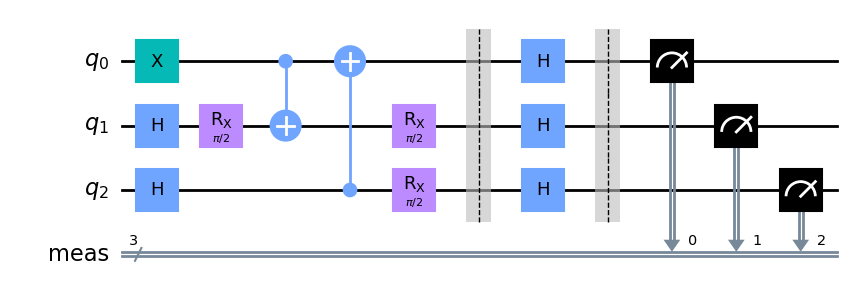

In [1057]:
#initial_states = [[1, 0], [0, 1], [1, 1], [1, -1], [1, 1.j], [1, -1.j], [1, 0], [0, 1]]
initial_operators = [I, X, RYGate(np.pi/2) , RYGate(-np.pi/2), RXGate(-np.pi/2), RXGate(np.pi/2), I, X]

print('Results of the counts, for the 8 different inputs state of circuit2:')

shots=10000

results_2 = []
for operator in initial_operators:
    num_qubits = 3
    circuit2 = QuantumCircuit(num_qubits)
    
    circuit2.append(operator, [0])

    circuit2.h([1,2])
    circuit2.rx(np.pi/2, 1)
    circuit2.cx(0,1)
    circuit2.cx(2,0)
    circuit2.rx(np.pi/2, 1)
    circuit2.rx(np.pi/2, 2)
    circuit2.barrier()
    circuit2.h([0,1,2])
    circuit2.measure_all()
    
    job = execute(circuit2, backend, shots=shots)
    counts = job.result().get_counts()
    print(counts)
    exp_value = 0
    for key, value in counts.items():
        if len(key.replace("0",""))%2 == 0:
            exp_value = exp_value + (value/shots)
        else:
            exp_value = exp_value - (value/shots)
    
    results_2.append(exp_value)
print("\n Expected value for each circuit: ")
print(results_2)
circuit2.draw('mpl')


#### Putting everythign together:

In [1058]:
coefficients_c = [0.5, 0.5, 0.5, -0.5, 0.5, -0.5,0.5, -0.5]

state_reconstructed = []
result = 0
for i in range(8):
    result = result + coefficients_c[i] * results_1[i]*results_2[i]
print("Expected value of X with the two circuits cutted and later joined: ", result)
print("Relative error: ", (expected_result - result)/expected_result)

Expected value of X with the two circuits cutted and later joined:  0.7076
Relative error:  -0.0006975167352030975


Where we again see that the results match!

# C) Finally we will now simulate it in a real quantum computer from IBM:

### First the full circuit

In [1059]:
# loading IBMQ account
from qiskit import IBMQ
from qiskit.providers.ibmq import least_busy

# IBMQ.save_account('Token') #you can replace TOKEN with your API token string  (https://quantum-computing.ibm.com/lab/docs/iql/manage/account/ibmq)
IBMQ.save_account('62b2395667e2ae4a43402ed209dd4aa2320a33e91c7e3ff65c2fabb7c143edd8e5c6143fe7fa54eff0d5d919a73afee28f0683bbd6b376c10f3a77b359f4fa88')
IBMQ.load_account()

provider = IBMQ.get_provider('ibm-q')
Qbackend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 2 and not x.configuration().simulator and x.status().operational==True))
print(Qbackend)

#Circuit original, no cutted: 
job = execute(circuit, Qbackend, shots=shots)
counts = job.result().get_counts()
print(counts)
exp_value = 0
for key, value in counts.items():
    if len(key.replace("0",""))%2 == 0:
        exp_value = exp_value + (value/shots)
    else:
        exp_value = exp_value - (value/shots)
print("Original circuit , no cutted: " , exp_value)

configrc.store_credentials:WARNING:2023-04-02 08:57:46,755: Credentials already present. Set overwrite=True to overwrite.
ibmqfactory.load_account:WARNING:2023-04-02 08:57:47,168: Credentials are already in use. The existing account in the session will be replaced.


ibmq_quito


### NOW WE ARE GOING TO SPLIT IT AGAIN:

#### Circuit 1:

In [ ]:
# circuit 1: 
list_of_operators = [I, H , "", I]

shots=10000
results_1 = []
counter = 0
provider = IBMQ.get_provider('ibm-q')
Qbackend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 2 and not x.configuration().simulator and x.status().operational==True))


#Circuit original, no cutted: 

for OPERATOR in list_of_operators:
    print('Operator:', OPERATOR)
    num_qubits = 3
    circuit1 = QuantumCircuit(num_qubits)

    circuit1.h([0,1,2])
    circuit1.cx(0,1)
    circuit1.cx(0,2)
    
    circuit1.ry(np.pi/4, 1)
    
    circuit1.rx(np.pi/5, 2)
    circuit1.rx(np.pi/2, 0)
    circuit1.rx(np.pi/2, 1)
    
    circuit1.h([0,1])

    if counter == 2:
        circuit1.sdg([2])
        circuit1.h([2])
    else:
        circuit1.append(OPERATOR, [2])
    
    circuit1.measure_all()
    
    job = execute(circuit1, Qbackend, shots=shots)
    
    counts = job.result().get_counts()
    print(counts)
    exp_value = 0
    
    for key, value in counts.items():
        if counter == 0:
            corrected_key=manual_replace(key,"0",0)
        else: 
            corrected_key=key
        if len(corrected_key.replace("0",""))%2 == 0:
            exp_value = exp_value + (value/shots)
        else:
            exp_value = exp_value - (value/shots)
    counter += 1
    results_1.append(exp_value)
print(results_1)
results_1= list(np.repeat(results_1, 2))

Operator: I


KeyboardInterrupt: 

#### Circuit 2:

In [ ]:
#initial_states = [[1, 0], [0, 1], [1, 1], [1, -1], [1, 1.j], [1, -1.j], [1, 0], [0, 1]]
initial_operators = [I, X, RYGate(np.pi/2) , RYGate(-np.pi/2), RXGate(-np.pi/2), RXGate(np.pi/2), I, X]

shots=10000
provider = IBMQ.get_provider('ibm-q')
Qbackend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 2 and not x.configuration().simulator and x.status().operational==True))


results_2 = []
for operator in initial_operators:
    num_qubits = 3
    circuit2 = QuantumCircuit(num_qubits)
    
    circuit2.append(operator, [0])

    circuit2.h([1,2])
    circuit2.rx(np.pi/2, 1)
    circuit2.cx(0,1)
    circuit2.cx(2,0)
    circuit2.rx(np.pi/2, 1)
    circuit2.rx(np.pi/2, 2)
    circuit2.barrier()
    circuit2.h([0,1,2])
    circuit2.measure_all()
    
    job = execute(circuit2, Qbackend, shots=shots)

counts = job.result().get_counts()
    
print(counts)
exp_value = 0
for key, value in counts.items():
    if len(key.replace("0",""))%2 == 0:
        exp_value = exp_value + (value/shots)
    else:
        exp_value = exp_value - (value/shots)

results_2.append(exp_value)
print(results_2)

IBMQProviderError: 'No provider matches the specified criteria: hub = ibm-q, group = None, project = None'

#### Putting everythign together:

In [ ]:
coefficients_c = [0.5, 0.5, 0.5, -0.5, 0.5, -0.5,0.5, -0.5]

state_reconstructed = []
result = 0
for i in range(8):
    result = result + coefficients_c[i] * results_1[i]*results_2[i]
print("Expected value of X with the two circuits cutted and later joined (with quantum computer): ", result)
print("Relative error: ", (expected_result - result)/expected_result)

Expected value of X with the two circuits cutted and later joined (with quantum computer):  0.7054000000000001
Relative error:  0.0024137531020173727


### Second step

The researchers are very happy that we know how to do cuts now. But they are seeing the complications of the final algorithm pile up! For this reason it will be useful to learn to optimize our circuit further before moving on to larger circuits, then we can be sure that we will be able to run them. In addition, sometimes it will also be necessary to do more than one cut, as we will see in the final step.

1. First of all, how does the number of measurements grow with the number of cuts? 

*Hint: You can use the same circuit from the previous step and try to do additional cuts. The most difficult case is when the cuts are on the same qubit - we won't require that you show us here how to do that, but we will be needing it in the third step.*

### It's exponential, concretelly grows as 4^number_cuts since we have to measure 4 qubits in the first circuit.

## It's for, but for another reason, because we have to prepare 4 qubits in circuit 2, and that is the worse case between circuit1 and circuit2 (read paper)

2. You probably saw that the growth is pretty bad. An incredibly useful optimization would be to reduce the scaling by changing the number of measurement-preparation pairs that we have to do. Maybe we don't need to do all the combinations, can you find a smaller set that gives us the statistics of the whole thing? 

*Hint: As we have explained above, measuring on the I and Z basis is the same, so we can save resources. Maybe we can find a relation for reducing the number of states that we have to prepare too?*

*Hint 2: From now on we will only require that you solve this by running the circuit in the quantum device or the quantum device simulator. However, you can still use the statevector simulation to help you find the right intuition.*


### Since we only need to measure in one basis for I and Z, we actually only need 3 measurements, so it would scalate as 3^number_cuts

## Answer after paper

3. Once you find a better scaling of the number of measurements and states initialization, run again the previous cut circuit in the simulation of the quantum computer and on the real device. Do we have more error now than before? It is what we would expect? 

Your answer here

4. Another strategy that may help you with errors is to run the circuit cut in parallel, in other words, use the same quantum computer to perform the measurements and the initialization at the same time. Of course, this only will work for small circuits that can be fitted into the quantum computer we possess. Despite this, implement the cut on the previous circuit in parallel and explain how many circuits we have to prepare compared with the previous case. 


The use of **optimization techniques will be evaluated**. Some ideas are: 
-  Error mitigation, measurement calibration, single qubit calibration. You can find more information in the qiskit documentation. 
- It may be that some qubits perform better than others.  If you're not running circuits in parallel, it will be useful to find which ones are best to use.
- If you have spare qubits in your chip, they might be able to play a role.
- You can experiment with different places and depths to cut or try any optimization method that you find suitable. 



In [ ]:
# Your code here 



### Third step

We are working now with more advanced circuits that are a crucial piece in running hamiltonian evolution algorithms. So, we're right at the door of real-world applications! However, this last step will be much harder. To make circuit cutting useful, we need to implement multiple cuts, and they will not always be independent. This means that we now need to think about how to piece the statistics back together when we can't build the expected values step by step going backwards from the end.

1. Cut this circuit with at least 1 cut. You may need more than one cut, but find the optimal strategy to perform the minimum number of cuts. Each cut should contain at least 3 qubits. 

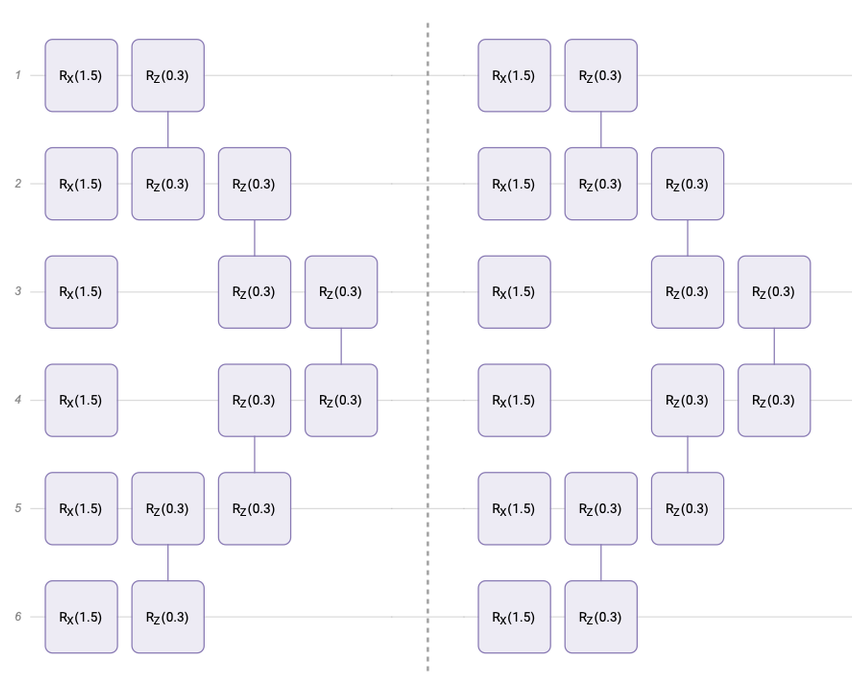

The dashed line does not have any physical meaning, they indicate the repetition of the same set of quantum gates. The two-qubit gates represent the following operation: $e^{it\sigma_z\otimes \sigma_z/2}$ where $t = 0.3$ and can be represented by 

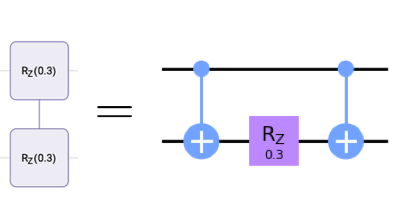


We recommend that you think of the problem in the original description ($O_1 ,\dots,  O_8$ and $\rho_1, \dots, \rho_8$), even if you found a reduction to the number of circuits you have to run. With this, you can see how the statistics would work with two cuts in the same qubit (with at least a gate in between). This can be generalized to many qubits!

*Hint: The algorithm to put together the statistics of the last cut before the measurement is slightly different than the rest. If you do several cuts on the same qubit, the algorithm for the rest of the cuts should be identical!*

Again, you can re-arrange the qubits or even move the order of the quantum gates (when this does not affect the result of the algorithm).

2. Again, you have to evaluate the quantum circuit with and without the cut or cuts. You can run in the *ibmq_jakarta* or *ibmq_guadalupe* (if your circuit fits) and try it first on the simulators. Measure the overlap between the state after the circuit $\ket{\psi}$ with the one state $\ket{111111}$, given by $|\bra{111111}\ket{\psi} \rangle |^2$. This can be thought of as the expectation value of the projector $\Pi = \ket{111111}\bra{111111}$. Feel free to apply the optimization methods that you have found in the previous steps. 


*Hint: You can use the qubit reset operation (see https://quantum-computing.ibm.com/lab/docs/iql/manage/systems/reset/backend_reset) or an extra qubit to simulate the cut (a kind of ancilla qubit). Ensure that the reset operation works fine in the real quantum device.*



In [ ]:
# Your code here

3. Once you have done this task, you have to cut this bigger circuit into sub-circuits that can be fitted in smaller quantum xips.

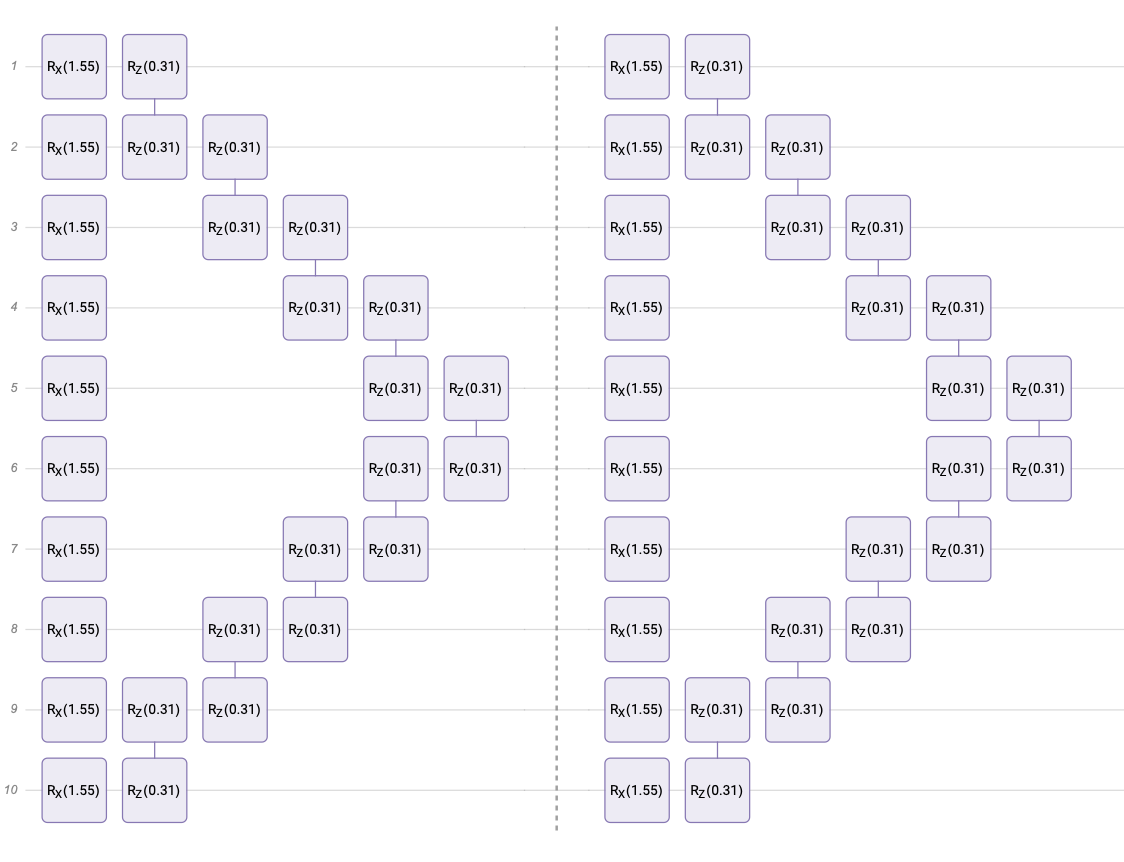




Can you find a way of evaluating the overlap with as much precision as possible?

If the result of cutting this circuit is precise enough, the simulations that the resistance can perform will be greatly enhanced. 

Thus, their dream of a sistematic dismantling of bioweapons will be very close to a reality...

In [ ]:
# Your code here 